In [56]:
import pandas as pd
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv('Data/03B-perfils-com-rfdv-02.csv', index_col=0)

In [58]:
df.head()

,distinct_id,count_eventos,Browser,city,country_code,created,initial_referring_domain,last_seen,os,region,Source,recencia,duracao,frequencia
0,QKK4JVKAB9BFV2yLVoPCccYAmXI9QwRs.88dcefc39941b...,8287,Chrome 84.0,São Paulo,BR,2020-05-08 07:11:46,$direct,2020-07-28 15:34:10,Windows,Sao Paulo,LA Criar Conta,15,81,3
1,1723852f6f284-05818830b468d6-134b3c29-49d40-17...,5793,Chrome 84.0,Sao Jose do Rio Preto,BR,2020-05-21 11:40:59,leads2b.com,2020-08-05 18:35:38,Windows,Sao Paulo,CC CNPJ - Painel de Dados - E-mails,7,76,13
2,1724d0fbffc130-045e6b955db998-d373666-100200-1...,4296,Chrome 83.0,Guarapuava,BR,2020-05-25 12:19:35,$direct,2020-06-05 09:17:50,Windows,Parana,LA Criar Conta,68,10,10
3,SGIRpUNfoHiJMGa2AO7VlWg6mjGlDGHt.27dd4e881e36a...,3668,Chrome 84.0,Londrina,BR,2020-05-11 08:15:58,$direct,2020-08-12 13:35:45,Windows,Parana,LA Criar Conta,0,93,36
4,17231edb3c2d1-023a308ef89129-d373666-1fa400-17...,3403,Chrome 83.0,Salto,BR,2020-05-20 05:52:36,$direct,2020-07-02 17:28:51,Windows,Sao Paulo,LA Criar Conta,41,43,12


In [59]:
df.shape

(8200, 14)

### temos alguns NaN, vamos limpar

In [60]:
df.isna().any()

distinct_id                 False
count_eventos               False
Browser                     False
city                         True
country_code                 True
created                     False
initial_referring_domain    False
last_seen                   False
os                          False
region                       True
Source                      False
recencia                    False
duracao                     False
frequencia                  False
dtype: bool

In [61]:
df.country_code.isnull().sum()
df.region.isnull().sum()
df.city.isnull().sum()

108

In [62]:
df.dropna(axis=0, inplace=True)

In [63]:
df.isna().any()

distinct_id                 False
count_eventos               False
Browser                     False
city                        False
country_code                False
created                     False
initial_referring_domain    False
last_seen                   False
os                          False
region                      False
Source                      False
recencia                    False
duracao                     False
frequencia                  False
dtype: bool

### criar um DataFrame apenas com as features numéricas

In [64]:
df_num = df[['count_eventos', 'recencia', 'duracao', 'frequencia']].copy()

In [65]:
df_num.dtypes

count_eventos    int64
recencia         int64
duracao          int64
frequencia       int64
dtype: object

### fazer normalização das features numéricas com MinMax

In [66]:
x = df_num.values

In [67]:
scaler = MinMaxScaler()

In [68]:
x_scaled = scaler.fit_transform(x)

In [69]:
df_num_nor = pd.DataFrame(x_scaled, columns = df_num.columns)

In [70]:
df_num_nor.head()

,count_eventos,recencia,duracao,frequencia
0,1.000000,0.178571,0.81,0.032258
1,0.699010,0.083333,0.76,0.193548
2,0.518344,0.809524,0.10,0.145161
3,0.442554,0.000000,0.93,0.564516
4,0.410572,0.488095,0.43,0.177419


### transformar as features categóricas em numéricas com One-hot

In [71]:
df_cat = df[['country_code', 'region', 'city', 'Browser', 'os', 'initial_referring_domain', 'Source']].copy()

In [72]:
df_cat.head()

,country_code,region,city,Browser,os,initial_referring_domain,Source
0,BR,Sao Paulo,São Paulo,Chrome 84.0,Windows,$direct,LA Criar Conta
1,BR,Sao Paulo,Sao Jose do Rio Preto,Chrome 84.0,Windows,leads2b.com,CC CNPJ - Painel de Dados - E-mails
2,BR,Parana,Guarapuava,Chrome 83.0,Windows,$direct,LA Criar Conta
3,BR,Parana,Londrina,Chrome 84.0,Windows,$direct,LA Criar Conta
4,BR,Sao Paulo,Salto,Chrome 83.0,Windows,$direct,LA Criar Conta


In [73]:
one_hot = OneHotEncoder().fit_transform(df_cat).toarray()

In [74]:
df_cat_nor = pd.DataFrame(one_hot)

In [75]:
df_cat_nor

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223,1224,1225,1226,1227,1228
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8087,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8088,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8089,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

### hora de juntar tudo

In [76]:
# df_nor = df_cat_nor.merge(df_num_nor)

In [77]:
df_nor = pd.merge(df_num_nor, df_cat_nor, left_index=True, right_index=True)

In [78]:
df_nor.head()

,count_eventos,recencia,duracao,frequencia,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,...,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223,1224,1225,1226,1227,1228
0,1.000000,0.178571,0.81,0.032258,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.699010,0.083333,0.76,0.193548,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.518344,0.809524,0.10,0.145161,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.442554,0.000000,0.93,0.564516,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.410572,0.488095,0.43,0.177419,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [79]:
df_nor.shape

(8092, 1233)

In [80]:
df_nor.to_csv('Data/04-perfils-normalizados.csv')

In [81]:
df_num_nor.to_csv('Data/04B-perfils-normalizados-apenas-rfdv.csv')

In [82]:
df_num.to_csv('Data/04C-perfils-normalizados-apenas-rfdv-sem-minmax.csv', index=False)

### rodar o Kmeans

antes de mais nada, vamos explorar quantos clusters deveríamos ter. começando pelo teste do cotovelo.

In [83]:
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_nor)
    df_nor["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_

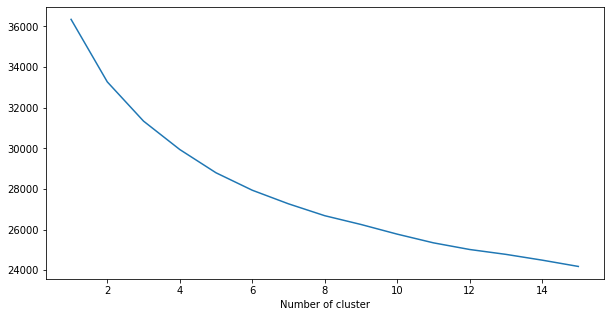

In [84]:
plt.figure(figsize=(10, 5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

uhmm, não está muito claro, mas parece ser por volta de de 9, isso é muito! vamos tentar um teste de silhouette agora.

In [85]:
for nc in range(2, 16):
  print('Numero de grupos', nc)
  kmeans = KMeans(n_clusters=nc)
  kmeans.fit(df_nor)
  ss = silhouette_score(df_nor, kmeans.labels_)
  print('Silhouette Score:', ss)
  print('-'*30)

Numero de grupos 2
Silhouette Score: 0.4970120454144811
------------------------------
Numero de grupos 3
Silhouette Score: 0.3367472446876205
------------------------------
Numero de grupos 4
Silhouette Score: 0.2856855534670589
------------------------------
Numero de grupos 5
Silhouette Score: 0.24954751806300982
------------------------------
Numero de grupos 6
Silhouette Score: 0.21634550079926204
------------------------------
Numero de grupos 7
Silhouette Score: 0.21214834232285767
------------------------------
Numero de grupos 8
Silhouette Score: 0.21752929531186677
------------------------------
Numero de grupos 9
Silhouette Score: 0.2005283013889968
------------------------------
Numero de grupos 10
Silhouette Score: 0.20539549419656128
------------------------------
Numero de grupos 11
Silhouette Score: 0.2085904146247893
------------------------------
Numero de grupos 12
Silhouette Score: 0.21548696394050298
------------------------------
Numero de grupos 13
Silhouette Sco

aqui, usar apenas 2 clusters resultou na maior nota, com 7 chegando bem perto também. estranho.

vamos olhar diretamente para os dados clusterizados em 7 grupos e ver o que ele nos diz.

In [86]:
kmeans = KMeans(n_clusters=7, max_iter=1000).fit(df_nor)

In [87]:
# aqui vou usar o df original sem normalizações, para ficar mais legível
df["clusters"] = kmeans.labels_
df.groupby('clusters').describe()

count_eventos                                                          recencia                                                     duracao                                                   frequencia                                              
                 count        mean         std  min   25%   50%     75%     max    count       mean        std  min   25%   50%    75%   max   count       mean        std  min  25%  50%   75%    max      count      mean       std  min  25%  50%  75%   max
clusters                                                                                                                                                                                                                                                       
0               1818.0   53.178768  169.835073  1.0   4.0  10.0   30.00  1953.0   1818.0  51.040154  21.274577  0.0  34.0  51.0  71.00  84.0  1818.0   5.128713  13.322673  0.0  0.0  0.0   0.0   85.0     1818.0  1.961496  2.847172  1.0  1.0  1.0  2.0  36.0
1                958.0   83.112735  250.816126  1.0   5.0  15.0   82.75  5793.0    958.0  26.944676  25.949957  0.0   7.0  16.0  45.00  84.0   958.0  17.622129  27.929139  0.0  0.0  0.0  27.0  100.0      958.0  4.110647  7.012325  1.0  1.0  1.0  4.0  61.0
2               1188.0   74.067340  297.265355  1.0   5.0  13.0   46.00  8287.0   1188.0  34.267677  20.324347  0.0  16.0  34.0  51.00  81.0  1188.0  10.699495  22.113853  0.0  0.0  0.0   7.0   98.0     1188.0  3.139731  5.912220  1.0  1.0  1.0  2.0  47.0
3               1121.0   58.018733  179.121479  1.0   6.0  14.0   45.00  3403.0   1121.0  46.950045  16.175742  0.0  34.0  46.0  58.00  83.0  1121.0   6.452275  13.829888  0.0  0.0  0.0   5.0   84.0     1121.0  2.241748  2.965198  1.0  1.0  1.0  2.0  26.0
4               1321.0   79.484481  191.081880  1.0   6.0  18.0   73.00  3668.0   1321.0  12.445874   8.240347  0.0   6.0  13.0  19.00  72.0  1321.0  17.414837  27.421965  0.0  0.0  0.0  27.0  100.0     1321.0  3.990916  6.939451  1.0  1.0  1.0  3.0  63.0
5                718.0   21.441504   53.685393  1.0   4.0   8.0   18.00   813.0    718.0  45.257660  23.114274  0.0  27.0  48.0  64.00  84.0   718.0   3.068245  12.492210  0.0  0.0  0.0   0.0   99.0      718.0  1.441504  1.802309  1.0  1.0  1.0  1.0  31.0
6                968.0  102.628099  252.582668  1.0  11.0  39.0  100.00  4296.0    968.0  47.891529  18.587049  0.0  34.0  47.0  63.25  83.0   968.0  10.650826  17.331848  0.0  0.0  1.0  15.0   89.0      968.0  3.005165  3.877250  1.0  1.0  1.0  3.0  43.0

no olho é difícil dizer, mas parecem ter muitos grupos, muitos clusters são muito parecidos.

vamos olhar agora só para 2 e ver no que dá.

In [100]:
kmeans = KMeans(n_clusters=2, max_iter=1000).fit(df_nor)

In [101]:
# aqui vou usar o df original sem normalizações, para ficar mais legível
df["clusters"] = kmeans.labels_
df.groupby('clusters').describe()

count_eventos                                                     recencia                                                    duracao                                                   frequencia                                              
                 count      mean         std  min  25%   50%   75%     max    count       mean        std  min   25%   50%   75%   max   count       mean        std  min  25%  50%   75%    max      count      mean       std  min  25%  50%  75%   max
clusters                                                                                                                                                                                                                                                 
0               4168.0  63.87380  191.356672  1.0  5.0  14.0  47.0  4296.0   4168.0  48.840451  19.089604  0.0  34.0  48.0  65.0  84.0  4168.0   6.648992  14.479726  0.0  0.0  0.0   4.0   89.0     4168.0  2.254798  3.125462  1.0  1.0  1.0  2.0  43.0
1               3924.0  72.08053  234.832218  1.0  5.0  13.0  56.0  8287.0   3924.0  26.420234  22.860905  0.0   8.0  19.0  41.0  84.0  3924.0  13.750000  25.264493  0.0  0.0  0.0  14.0  100.0     3924.0  3.456932  6.317493  1.0  1.0  1.0  3.0  63.0

mesmo com apenas 2 clusters os grupos estão muito parecidos e com desvios padrões muito altos. isso não parece estar funcionando.

### e se eu fizer a mesma coisa porém só com RFDV?

In [88]:
sse={}

In [89]:
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_num_nor)
    df_num_nor["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_

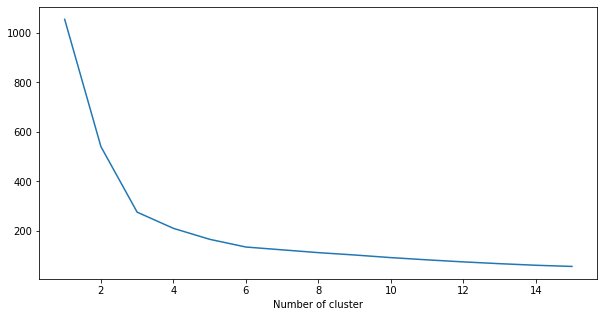

In [90]:
plt.figure(figsize=(10, 5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [91]:
for nc in range(2, 20):
  print('Numero de grupos', nc)
  kmeans = KMeans(n_clusters=nc)
  kmeans.fit(df_num_nor)
  ss = silhouette_score(df_num_nor, kmeans.labels_)
  print('Silhouette Score:', ss)
  print('-'*30)

Numero de grupos 2
Silhouette Score: 0.6214688211710575
------------------------------
Numero de grupos 3
Silhouette Score: 0.6323725461583163
------------------------------
Numero de grupos 4
Silhouette Score: 0.6659924480826048
------------------------------
Numero de grupos 5
Silhouette Score: 0.6969038662659041
------------------------------
Numero de grupos 6
Silhouette Score: 0.7068578648808834
------------------------------
Numero de grupos 7
Silhouette Score: 0.7309494624112997
------------------------------
Numero de grupos 8
Silhouette Score: 0.7502411000800907
------------------------------
Numero de grupos 9
Silhouette Score: 0.7879011876485245
------------------------------
Numero de grupos 10
Silhouette Score: 0.816449945768144
------------------------------
Numero de grupos 11
Silhouette Score: 0.8269024025106128
------------------------------
Numero de grupos 12
Silhouette Score: 0.8606130530525783
------------------------------
Numero de grupos 13
Silhouette Score: 0.8

novamente uma grande diferença entre o teste de cotovelo e o de silhueta, e agora o de silhueta está bem estranho, apontando para 15 grupos.

In [97]:
kmeans = KMeans(n_clusters=4, max_iter=1000).fit(df_num_nor)

In [98]:
# de novo joguei os clusters direto no DF pré-normalização para não ter que fazer o inverse_transform
df_num["clusters"] = kmeans.labels_

In [99]:
df_num.groupby('clusters').describe()

count_eventos                                                        recencia                                                     duracao                                                   frequencia                                              
                 count        mean         std  min  25%   50%    75%     max    count       mean        std   min   25%   50%   75%   max   count       mean        std  min  25%  50%   75%    max      count      mean       std  min  25%  50%  75%   max
clusters                                                                                                                                                                                                                                                     
0               2588.0   72.283617  238.607557  1.0  5.0  17.0   68.0  8287.0   2588.0  35.558733  20.594715   0.0  13.0  43.0  51.0  60.0  2588.0  16.147604  26.124909  0.0  0.0  0.0  23.0   98.0     2588.0  3.191267  4.149800  1.0  1.0  1.0  3.0  26.0
1               1471.0  144.877634  319.858468  1.0  7.0  21.0  120.0  3668.0   1471.0  53.949694  19.834799   0.0  43.0  63.0  69.0  73.0  1471.0  19.663494  27.146797  0.0  0.0  1.0  40.0  100.0     1471.0  5.591434  9.315317  1.0  1.0  2.0  5.0  63.0
2               2030.0   35.989163   91.452648  1.0  5.0  12.0   36.0  2257.0   2030.0  28.497537   5.965214  19.0  23.0  28.0  34.0  44.0  2030.0   3.066502   7.483184  0.0  0.0  0.0   1.0   37.0     2030.0  1.636946  1.632505  1.0  1.0  1.0  2.0  18.0
3               2003.0   37.856715  144.437598  1.0  4.0  10.0   29.0  4296.0   2003.0  38.943585  33.615210   0.0   9.0  16.0  77.0  84.0  2003.0   2.360459   5.803292  0.0  0.0  0.0   1.0   37.0     2003.0  1.575637  1.593457  1.0  1.0  1.0  1.0  20.0

parece um pouco melhor, mas o desvio padrão ainda está muito alto comparado com as médias, especialmente no count_eventos.